# Forcasting Nutrient Density of Food Consumption

## Background

## Business Understanding

### Problem Statements

1. What 

2. Why

3. How

### Goals

1. 

2. 

3. 

### Solution Statements

1. 

2.

3.

## Data Understanding

### Dataset

Resouce:
[Food Nutrition Dataset](https://www.kaggle.com/datasets/utsavdey1410/food-nutrition-dataset/data)

#### Overview

The Comprehensive Nutritional Food Database provides detailed nutritional information for a wide range of food items commonly consumed around the world. This dataset aims to support dietary planning, nutritional analysis, and educational purposes by providing extensive data on the macro and micronutrient content of foods.

#### Column Description

No | Column | Description
---|--------|------------
1 | Food | The name or type of the food item
2 | Caloric Value | Total energy provided by the food, typically measured in kilocalories(kcal) per 100 grams.
3 | Fat (in g) | Total amount of fats in grams per 100 grams, including the breakdowns that follow
4 | Saturated Fats (in g) | Amount of saturated fats (fats that typically raise the level of cholesterol in the blood) in grams per 100 grams.
5 | Monounsaturated Fats (in g) | Amount of monounsaturated fats (considered heart-healthy fats) in grams per 100 grams.
6 | Polyunsaturated Fats (in g) | Amount of polyunsaturated fats (include essential fats your body needs but can't produce itself) in grams per 100 grams.
7 | Carbohydrates (in g) | Total carbohydrates in grams per 100 grams, including sugars.
8 | Sugars (in g) | Total sugars in grams per 100 grams, a subset of carbohydrates.
9 | Protein (in g) | Total proteins in grams per 100 grams, essential for body repair and growth.
10 | Dietary Fiber (in g) | Fiber content in grams per 100 grams, important for digestive health.
11 | Cholesterol (in mg) | Cholesterol content in milligrams per 100 grams, pertinent for cardiovascular health.
12 | Sodium (in mg) | Sodium content in milligrams per 100 grams, crucial for fluid balance and nerve function.
13 | Water (in g) | Water content in grams per 100 grams, which affects the food's energy density.
14 | Vitamin A (in mg) | Amount of Vitamin A in micrograms per 100 grams, impoertant for vision and immune functioning.
15 | Vitamin B1 (Thiamine)(in mg) | Essential for glucose metabolism.
16 | Vitamin B11 (Folic Acid)(in mg) | Crucial for cell function and tissue growth, particularly important in pregnancy.
17 | Vitamin B12(in mg) | Important for brain function and blood formation.
18 | Vitamin B2 (Riboflavin)(in mg) | Necessary for energy production, cell function, and fat metabolism.
19 | Vitamin B3 (Niacin)(in mg) | Support digestive system, skin, and nerves health.
20 | Vitamin B5 (Pantothenic Acid)(in mg) | Necessary for making blood cells and helps convert food into energy.
21 | Viatmin B6 (in mg): Important for normal brain development and keeping the nervous and immune system healthy.
22 | Vitamin C (in mg) | Important for the repair of all body tissues.
23 | Vitamin D (in mg) | Crucial for absorption of calcium, promoting bone growth and health.
24 | Vitamin E (in mg) | Acts as an antioxidant, helping to protect cells from the damage caused by free radicals.
25 | Vitamin K (in mg) | Necessary for blood clotting and bone health.
26 | Calcium (in mg) | Vital for building and maintaining strong bones and teeth.
27 | Copper (in mg) | Helps with the formation of collagen, increases the absorption of iron and plays a role in energy production.
28 | Iron (in mg) | Essential for the creation of red blood cells.
29 | Magnesium (in mg) | Important for many processes in the body including regulation of muscle and nerve function, blood sugar levels, and blood pressure and making protein, bone, and DNA.
30 | Manganese (in mg) | Involved in the formation of bones, blood clotting factors, and enzymes that play a role in fat and carbohydrate metabolism, calcium absorption, and blood sugar regulation.
31 | Phosporus (in mg) | Helps with the formation of bones and teeth and is necessary for the body to make protein for the growth, maintenance, and repair of cells and tissues.
32 | Potassium (in mg) | Helps regulate fluid balance, muscle contractions, and nerve signals.
33 | Selenium (in mg) | Important for reproduction, thyroid gland function, DNA production, and protecting the body from damage caused by free radicals and from infection.
34 | Zinc (in mg) | Necessary for the immune system to properly function and plays a role in cell division, cell growth, wound healing, and the breakdown of carbohydrates.
35 | Nutrition Density | A metric indicating the nutrient richness of the food per calorie.

### Explore

#### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import mse, huber
from tensorflow.keras.callbacks import EarlyStopping, Callback, ModelCheckpoint

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Load Data

In [3]:
# Data 1
data_1_url = "https://raw.githubusercontent.com/Sulbae/OlahGizi-Project/refs/heads/main/Nutrition%20Prediction%20Model/dataset/FOOD-DATA-GROUP1.csv"
data_1_df = pd.read_csv(data_1_url)

# Data 2
data_2_url = "https://raw.githubusercontent.com/Sulbae/OlahGizi-Project/refs/heads/main/Nutrition%20Prediction%20Model/dataset/FOOD-DATA-GROUP2.csv"
data_2_df = pd.read_csv(data_2_url)

# Data 3
data_3_url = "https://raw.githubusercontent.com/Sulbae/OlahGizi-Project/refs/heads/main/Nutrition%20Prediction%20Model/dataset/FOOD-DATA-GROUP3.csv"
data_3_df = pd.read_csv(data_3_url)

# Data 4
data_4_url = "https://raw.githubusercontent.com/Sulbae/OlahGizi-Project/refs/heads/main/Nutrition%20Prediction%20Model/dataset/FOOD-DATA-GROUP4.csv"
data_4_df = pd.read_csv(data_4_url)

# Data 5
data_5_url = "https://raw.githubusercontent.com/Sulbae/OlahGizi-Project/refs/heads/main/Nutrition%20Prediction%20Model/dataset/FOOD-DATA-GROUP5.csv"
data_5_df = pd.read_csv(data_5_url)

#### Check Data

In [4]:
all_data = [data_1_df, data_2_df, data_3_df, data_4_df, data_5_df]

for data in all_data:
    print(data.shape)
    print(data.columns.tolist())

(551, 37)
['Unnamed: 0.1', 'Unnamed: 0', 'food', 'Caloric Value', 'Fat', 'Saturated Fats', 'Monounsaturated Fats', 'Polyunsaturated Fats', 'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water', 'Vitamin A', 'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Calcium', 'Copper', 'Iron', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Zinc', 'Nutrition Density']
(319, 37)
['Unnamed: 0.1', 'Unnamed: 0', 'food', 'Caloric Value', 'Fat', 'Saturated Fats', 'Monounsaturated Fats', 'Polyunsaturated Fats', 'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water', 'Vitamin A', 'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Calcium', 'Copper', 'Iron', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium', 'Selenium

_Findings:_
* All data have 37 typical columns
* Data Shape:
    - Data 1 has 551 rows, 
    - Data 2 has 319 rows, 
    - Data 3 has 571 rows, 
    - Data 4 has 232 rows, 
    - Data 5 has 722 rows.
* There are two unknown columns that look useless, namely columns Unnamed: 0.1 and Unnamed: 0.

In [5]:
# Drop the unkonwn columns
columns_to_drop = ["Unnamed: 0.1", "Unnamed: 0"]

for data in all_data:
    data.drop(columns=columns_to_drop, inplace=True)
    print(data.shape)
    print(data.columns.tolist())

(551, 35)
['food', 'Caloric Value', 'Fat', 'Saturated Fats', 'Monounsaturated Fats', 'Polyunsaturated Fats', 'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water', 'Vitamin A', 'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Calcium', 'Copper', 'Iron', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Zinc', 'Nutrition Density']
(319, 35)
['food', 'Caloric Value', 'Fat', 'Saturated Fats', 'Monounsaturated Fats', 'Polyunsaturated Fats', 'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water', 'Vitamin A', 'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Calcium', 'Copper', 'Iron', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Zinc', 'Nutrition Density']
(571, 35)
['food', 'Caloric 

##### Data 1

In [6]:
data_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   food                  551 non-null    object 
 1   Caloric Value         551 non-null    int64  
 2   Fat                   551 non-null    float64
 3   Saturated Fats        551 non-null    float64
 4   Monounsaturated Fats  551 non-null    float64
 5   Polyunsaturated Fats  551 non-null    float64
 6   Carbohydrates         551 non-null    float64
 7   Sugars                551 non-null    float64
 8   Protein               551 non-null    float64
 9   Dietary Fiber         551 non-null    float64
 10  Cholesterol           551 non-null    float64
 11  Sodium                551 non-null    float64
 12  Water                 551 non-null    float64
 13  Vitamin A             551 non-null    float64
 14  Vitamin B1            551 non-null    float64
 15  Vitamin B11           5

In [7]:
# Check duplicates
print(f"Duplicated data:", data_1_df.duplicated().sum())

# recheck missing value
print(f"Missing value:", data_1_df.isna().sum().sum())

Duplicated data: 0
Missing value: 0


In [8]:
data_1_df.head()

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


In [9]:
data_1_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
food,551,551,cream cheese,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caloric Value,551.0,NaN,NaN,NaN,237.359347,199.235598,3.0,94.5,186.0,337.0,1578.0
Fat,551.0,NaN,NaN,NaN,10.766933,12.544196,0.0,2.5,6.6,14.4,87.5
Saturated Fats,551.0,NaN,NaN,NaN,3.722715,5.397021,0.0,0.5,1.8,4.8,43.5
Monounsaturated Fats,551.0,NaN,NaN,NaN,4.001564,5.540608,0.0,0.6,2.2,5.15,48.0
Polyunsaturated Fats,551.0,NaN,NaN,NaN,2.170793,3.47082,0.0,0.4,1.1,2.6,40.1
Carbohydrates,551.0,NaN,NaN,NaN,15.819036,20.28932,0.0,0.0,5.1,28.7,128.3
Sugars,551.0,NaN,NaN,NaN,2.708907,7.455666,0.0,0.0,0.0,2.2,70.8
Protein,551.0,NaN,NaN,NaN,18.417857,18.932404,0.0,5.3,11.9,25.65,86.9
Dietary Fiber,551.0,NaN,NaN,NaN,1.098145,2.156681,0.0,0.0,0.0,1.5,17.5


##### Data 2

In [10]:
data_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   food                  319 non-null    object 
 1   Caloric Value         319 non-null    int64  
 2   Fat                   319 non-null    float64
 3   Saturated Fats        319 non-null    float64
 4   Monounsaturated Fats  319 non-null    float64
 5   Polyunsaturated Fats  319 non-null    float64
 6   Carbohydrates         319 non-null    float64
 7   Sugars                319 non-null    float64
 8   Protein               319 non-null    float64
 9   Dietary Fiber         319 non-null    float64
 10  Cholesterol           319 non-null    float64
 11  Sodium                319 non-null    float64
 12  Water                 319 non-null    float64
 13  Vitamin A             319 non-null    float64
 14  Vitamin B1            319 non-null    float64
 15  Vitamin B11           3

In [11]:
# Check duplicates
print(f"Duplicated data:", data_2_df.duplicated().sum())

# recheck missing value
print(f"Missing value:", data_2_df.isna().sum().sum())

Duplicated data: 0
Missing value: 0


In [12]:
data_2_df.head()

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,eggnog,224,10.6,6.6,3.3,0.5,20.4,20.4,11.600,0.0,...,330.2,0.051,0.500,48.3,0.024,276.9,419.1,0.094,1.200,377.200
1,beer light,96,0.0,0.0,0.0,0.0,5.4,0.3,0.800,0.0,...,13.2,0.095,0.014,16.5,0.094,39.6,69.3,0.077,0.044,19.456
2,beer budweiser,12,0.0,0.0,0.0,0.0,0.9,0.0,0.100,0.0,...,1.2,0.095,0.000,2.1,0.038,3.8,9.7,0.000,0.000,2.200
3,weizenbier erdinger,220,18.0,13.0,1.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,18.000
4,beer light budweiser,9,0.0,0.0,0.0,0.0,0.4,0.0,0.066,0.0,...,0.9,0.088,0.000,2.1,0.007,3.2,7.7,0.000,0.000,1.320


In [13]:
data_2_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
food,319,319,eggnog,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caloric Value,319.0,NaN,NaN,NaN,251.689655,303.56922,0.0,82.0,155.0,352.5,3190.0
Fat,319.0,NaN,NaN,NaN,6.40247,13.741972,0.0,0.0835,1.8,6.8,161.3
Saturated Fats,319.0,NaN,NaN,NaN,3.458342,22.613318,0.0,0.005,0.3,2.25,396.1
Monounsaturated Fats,319.0,NaN,NaN,NaN,3.139176,9.050333,0.0,0.0,0.4,2.45,99.9
Polyunsaturated Fats,319.0,NaN,NaN,NaN,2.315809,11.619096,0.0,0.0,0.3,1.65,188.0
Carbohydrates,319.0,NaN,NaN,NaN,38.088056,49.627455,0.0,4.7,18.6,49.75,390.2
Sugars,319.0,NaN,NaN,NaN,8.558774,23.491936,0.0,0.0,0.3,6.6,291.5
Protein,319.0,NaN,NaN,NaN,5.305853,7.802785,0.0,0.1,2.0,7.0,52.2
Dietary Fiber,319.0,NaN,NaN,NaN,2.811696,6.241841,0.0,0.0,0.5,2.6,76.5


##### Data 3

In [14]:
data_3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   food                  571 non-null    object 
 1   Caloric Value         571 non-null    int64  
 2   Fat                   571 non-null    float64
 3   Saturated Fats        571 non-null    float64
 4   Monounsaturated Fats  571 non-null    float64
 5   Polyunsaturated Fats  571 non-null    float64
 6   Carbohydrates         571 non-null    float64
 7   Sugars                571 non-null    float64
 8   Protein               571 non-null    float64
 9   Dietary Fiber         571 non-null    float64
 10  Cholesterol           571 non-null    float64
 11  Sodium                571 non-null    float64
 12  Water                 571 non-null    float64
 13  Vitamin A             571 non-null    float64
 14  Vitamin B1            571 non-null    float64
 15  Vitamin B11           5

In [15]:
# Check duplicates
print(f"Duplicated data:", data_3_df.duplicated().sum())

# recheck missing value
print(f"Missing value:", data_3_df.isna().sum().sum())

Duplicated data: 0
Missing value: 0


In [16]:
data_3_df.head()

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,nectarine,66,0.500,0.066,0.100,0.200,15.8,11.8,1.600,2.6,...,0.081,9.000,0.100,0.4,13.500,0.002,39.0,301.500,0.000,20.735
1,kiwifruit gold,51,0.200,0.008,0.099,0.051,12.8,10.0,0.800,1.1,...,13.800,0.100,0.200,9.7,0.072,20.300,255.2,0.003,0.077,159.686
2,prickly pear raw,8,0.072,0.000,0.000,0.000,1.9,0.2,0.001,1.0,...,34.200,0.051,0.021,13.1,0.100,2.100,24.7,0.023,0.073,39.263
3,pineapple,45,0.100,0.074,0.001,0.087,11.8,8.9,0.500,1.3,...,0.061,11.700,0.091,0.3,10.800,0.800,7.2,98.100,0.061,13.970
4,rowan,253,4.600,0.600,0.000,0.000,54.5,32.1,5.200,14.1,...,34.200,2.400,5.000,73.0,0.400,118.600,298.7,0.000,1.000,176.400


In [17]:
data_3_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
food,571,571,nectarine,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caloric Value,571.0,NaN,NaN,NaN,348.036778,652.345036,0.0,43.0,145.0,406.5,6077.0
Fat,571.0,NaN,NaN,NaN,18.646373,50.384078,0.0,0.4,2.4,13.65,550.7
Saturated Fats,571.0,NaN,NaN,NaN,7.76435,32.934709,0.0,0.0695,0.7,4.45,672.0
Monounsaturated Fats,571.0,NaN,NaN,NaN,7.704037,23.051346,0.0,0.0505,0.6,5.1,291.1
Polyunsaturated Fats,571.0,NaN,NaN,NaN,2.290173,7.069146,0.0,0.086,0.4,1.7,67.9
Carbohydrates,571.0,NaN,NaN,NaN,14.24373,28.119412,0.0,0.0,0.8,13.95,134.8
Sugars,571.0,NaN,NaN,NaN,3.200688,9.721198,0.0,0.0,0.0,0.6,97.7
Protein,571.0,NaN,NaN,NaN,28.998455,58.373374,0.0,1.1,6.2,40.9,560.3
Dietary Fiber,571.0,NaN,NaN,NaN,3.383385,8.439538,0.0,0.0,0.0,2.05,58.6


##### Data 4

In [18]:
data_4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   food                  232 non-null    object 
 1   Caloric Value         232 non-null    int64  
 2   Fat                   232 non-null    float64
 3   Saturated Fats        232 non-null    float64
 4   Monounsaturated Fats  232 non-null    float64
 5   Polyunsaturated Fats  232 non-null    float64
 6   Carbohydrates         232 non-null    float64
 7   Sugars                232 non-null    float64
 8   Protein               232 non-null    float64
 9   Dietary Fiber         232 non-null    float64
 10  Cholesterol           232 non-null    float64
 11  Sodium                232 non-null    float64
 12  Water                 232 non-null    float64
 13  Vitamin A             232 non-null    float64
 14  Vitamin B1            232 non-null    float64
 15  Vitamin B11           2

In [19]:
# Check duplicates
print(f"Duplicated data:", data_1_df.duplicated().sum())

# recheck missing value
print(f"Missing value:", data_1_df.isna().sum().sum())

Duplicated data: 0
Missing value: 0


In [20]:
data_4_df.head()

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,chocolate pudding fat free,105,0.3,0.0,0.00,0.000,23.6,17.8,2.2,0.3,...,44.100,0.035,1.900,17.0,0.040,61.0,235.0,0.052,0.300,72.400
1,tapioca pudding,143,4.3,1.1,2.80,0.088,23.9,16.4,2.1,0.0,...,78.100,0.026,0.100,6.6,0.096,66.0,101.2,0.000,0.200,108.800
2,tapioca pudding fat free,105,0.4,0.1,0.08,0.067,23.9,15.9,1.6,0.0,...,58.200,0.004,0.100,5.6,0.023,73.9,78.4,0.000,0.200,84.500
3,rice pudding,122,2.4,1.4,0.60,0.100,20.8,13.1,3.6,0.3,...,0.063,107.400,0.014,0.1,9.000,0.1,92.7,141.300,0.083,27.329
4,corn pudding,328,12.6,6.3,3.90,1.400,42.4,16.5,11.1,3.0,...,0.066,97.500,0.100,1.3,37.500,0.2,225.0,440.000,0.069,69.795


In [21]:
data_4_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
food,232,232,chocolate pudding fat free,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caloric Value,232.0,NaN,NaN,NaN,156.219828,197.370526,0.0,46.0,108.0,163.0,1010.0
Fat,232.0,NaN,NaN,NaN,7.381918,17.922498,0.0,0.1,0.5,4.075,95.5
Saturated Fats,232.0,NaN,NaN,NaN,2.117974,7.142897,0.0,0.022,0.1,1.3,80.0
Monounsaturated Fats,232.0,NaN,NaN,NaN,4.11678,9.091446,0.0,0.018,0.1,2.075,44.7
Polyunsaturated Fats,232.0,NaN,NaN,NaN,2.96719,7.872434,0.0,0.011,0.0935,1.4,51.3
Carbohydrates,232.0,NaN,NaN,NaN,17.823168,18.923324,0.0,2.175,14.0,28.475,127.0
Sugars,232.0,NaN,NaN,NaN,10.297345,21.232496,0.0,0.0,1.2,17.4,255.0
Protein,232.0,NaN,NaN,NaN,4.975905,14.230972,0.0,0.1,1.0,4.0,175.0
Dietary Fiber,232.0,NaN,NaN,NaN,1.813289,4.103511,0.0,0.0,0.2,1.6,34.0


##### Data 5

In [22]:
data_5_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   food                  722 non-null    object 
 1   Caloric Value         722 non-null    int64  
 2   Fat                   722 non-null    float64
 3   Saturated Fats        722 non-null    float64
 4   Monounsaturated Fats  722 non-null    float64
 5   Polyunsaturated Fats  722 non-null    float64
 6   Carbohydrates         722 non-null    float64
 7   Sugars                722 non-null    float64
 8   Protein               722 non-null    float64
 9   Dietary Fiber         722 non-null    float64
 10  Cholesterol           722 non-null    float64
 11  Sodium                722 non-null    float64
 12  Water                 722 non-null    float64
 13  Vitamin A             722 non-null    float64
 14  Vitamin B1            722 non-null    float64
 15  Vitamin B11           7

In [23]:
# Check duplicates
print(f"Duplicated data:", data_1_df.duplicated().sum())

# recheck missing value
print(f"Missing value:", data_1_df.isna().sum().sum())

Duplicated data: 0
Missing value: 0


In [24]:
data_5_df.head()

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,margarine with yoghurt,88,9.8,1.9,5.6,2.0,0.073,0.0,0.058,0.0,...,2.8,0.001,0.027,0.3,0.0,2.2,3.5,0.000,0.008,12.971
1,sunflower seed butter,99,8.8,0.7,6.2,1.6,3.700,1.7,2.800,0.9,...,10.2,0.300,0.700,49.8,0.3,106.6,92.2,0.075,0.800,27.500
2,hazelnut oil,120,13.6,1.0,10.6,1.4,0.000,0.0,0.000,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,13.600
3,menhaden fish oil,1966,218.0,66.3,58.2,74.5,0.000,0.0,0.000,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,218.000
4,cod liver fish oil,123,13.6,3.1,6.4,3.1,0.000,0.0,0.000,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,17.700


In [25]:
data_5_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
food,722,722,margarine with yoghurt,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caloric Value,722.0,NaN,NaN,NaN,124.490305,218.128817,0.0,24.25,68.5,123.0,1966.0
Fat,722.0,NaN,NaN,NaN,5.592144,19.851477,0.0,0.2,0.7,4.375,218.0
Saturated Fats,722.0,NaN,NaN,NaN,1.82955,11.135124,0.0,0.04325,0.1,0.875,196.2
Monounsaturated Fats,722.0,NaN,NaN,NaN,1.855496,5.83894,0.0,0.039,0.1,1.4,95.9
Polyunsaturated Fats,722.0,NaN,NaN,NaN,1.696861,6.403071,0.0,0.06025,0.2,1.0,115.8
Carbohydrates,722.0,NaN,NaN,NaN,15.770335,23.106365,0.0,2.025,8.15,19.775,190.1
Sugars,722.0,NaN,NaN,NaN,3.097204,7.878036,0.0,0.0,0.7,3.0,105.0
Protein,722.0,NaN,NaN,NaN,3.520122,6.511791,0.0,0.3,1.8,3.7,67.9
Dietary Fiber,722.0,NaN,NaN,NaN,2.077719,3.505197,0.0,0.079,0.95,2.8,50.2


#### Merge Data

In [26]:
# Merge all data into one
merged_data = pd.concat([data_1_df, data_2_df, data_3_df, data_4_df, data_5_df], axis=0, ignore_index=True)

In [27]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   food                  2395 non-null   object 
 1   Caloric Value         2395 non-null   int64  
 2   Fat                   2395 non-null   float64
 3   Saturated Fats        2395 non-null   float64
 4   Monounsaturated Fats  2395 non-null   float64
 5   Polyunsaturated Fats  2395 non-null   float64
 6   Carbohydrates         2395 non-null   float64
 7   Sugars                2395 non-null   float64
 8   Protein               2395 non-null   float64
 9   Dietary Fiber         2395 non-null   float64
 10  Cholesterol           2395 non-null   float64
 11  Sodium                2395 non-null   float64
 12  Water                 2395 non-null   float64
 13  Vitamin A             2395 non-null   float64
 14  Vitamin B1            2395 non-null   float64
 15  Vitamin B11          

In [28]:
# Ensure there is no duplicated data
print(f"Duplicated data:", merged_data.duplicated().sum())

Duplicated data: 0


In [29]:
merged_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
food,2395,2395,cream cheese,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caloric Value,2395.0,NaN,NaN,NaN,223.76952,384.728244,0.0,44.5,117.0,258.0,6077.0
Fat,2395.0,NaN,NaN,NaN,10.176276,29.008915,0.0,0.3,2.1,9.4,550.7
Saturated Fats,2395.0,NaN,NaN,NaN,3.924917,19.502262,0.0,0.064,0.5,2.7,672.0
Monounsaturated Fats,2395.0,NaN,NaN,NaN,4.133622,12.939587,0.0,0.058,0.5,3.4,291.1
Polyunsaturated Fats,2395.0,NaN,NaN,NaN,2.152844,7.145738,0.0,0.071,0.4,1.7,188.0
Carbohydrates,2395.0,NaN,NaN,NaN,18.589021,29.406134,0.0,0.5,6.8,25.05,390.2
Sugars,2395.0,NaN,NaN,NaN,4.457459,13.339929,0.0,0.0,0.086,3.2,291.5
Protein,2395.0,NaN,NaN,NaN,13.400777,32.294246,0.0,0.8,3.5,13.3,560.3
Dietary Fiber,2395.0,NaN,NaN,NaN,2.23579,5.404483,0.0,0.0,0.2,2.2,76.5


#### Convert Data

In [30]:
merged_data.head()

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


_Note:_
* Caloric Value (in kcal)
* Fat, Saturated Fats, Monounsaturated Fats, Polyunsaturated Fats, Carbohydrates, Sugars, Protein, Dietary Fiber, and Water (in g)
* __all of these should be in mg__

In [31]:
# kcal to mg
merged_data["Caloric Value"] = merged_data["Caloric Value"] * 129.6 

In [32]:
# grams to milligrams
column_in_grams = ["Fat", 
                   "Saturated Fats",
                   "Monounsaturated Fats",
                   "Polyunsaturated Fats",
                   "Carbohydrates",
                   "Sugars",
                   "Protein",
                   "Dietary Fiber",
                   "Water"]

merged_data[column_in_grams] = merged_data[column_in_grams] * 1000

In [33]:
merged_data.head()

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,cream cheese,6609.6,5000.0,2900.0,1300.0,200.0,800.0,500.0,900.0,0.0,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,neufchatel cheese,27864.0,19400.0,10900.0,4900.0,800.0,3100.0,2700.0,7800.0,0.0,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,requeijao cremoso light catupiry,6350.4,3600.0,2300.0,900.0,0.0,900.0,3400.0,800.0,100.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,ricotta cheese,3888.0,2000.0,1300.0,500.0,2.0,1500.0,91.0,1500.0,0.0,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,cream cheese low fat,3888.0,2300.0,1400.0,600.0,42.0,1200.0,900.0,1200.0,0.0,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


In [34]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Caloric Value,2395.0,29000.529770,49860.780391,0.0,5767.2000,15163.200,33436.8000,787579.2
Fat,2395.0,10176.275574,29008.914908,0.0,300.0000,2100.000,9400.0000,550700.0
Saturated Fats,2395.0,3924.916910,19502.261837,0.0,64.0000,500.000,2700.0000,672000.0
Monounsaturated Fats,2395.0,4133.622129,12939.587432,0.0,58.0000,500.000,3400.0000,291100.0
Polyunsaturated Fats,2395.0,2152.843841,7145.737578,0.0,71.0000,400.000,1700.0000,188000.0
Carbohydrates,2395.0,18589.021294,29406.134008,0.0,500.0000,6800.000,25050.0000,390200.0
Sugars,2395.0,4457.459290,13339.928789,0.0,0.0000,86.000,3200.0000,291500.0
Protein,2395.0,13400.777453,32294.246309,0.0,800.0000,3500.000,13300.0000,560300.0
Dietary Fiber,2395.0,2235.790397,5404.483373,0.0,0.0000,200.000,2200.0000,76500.0
Cholesterol,2395.0,62.171937,385.352876,0.0,0.0000,0.000,26.4500,10509.0


#### Univariate Analysis

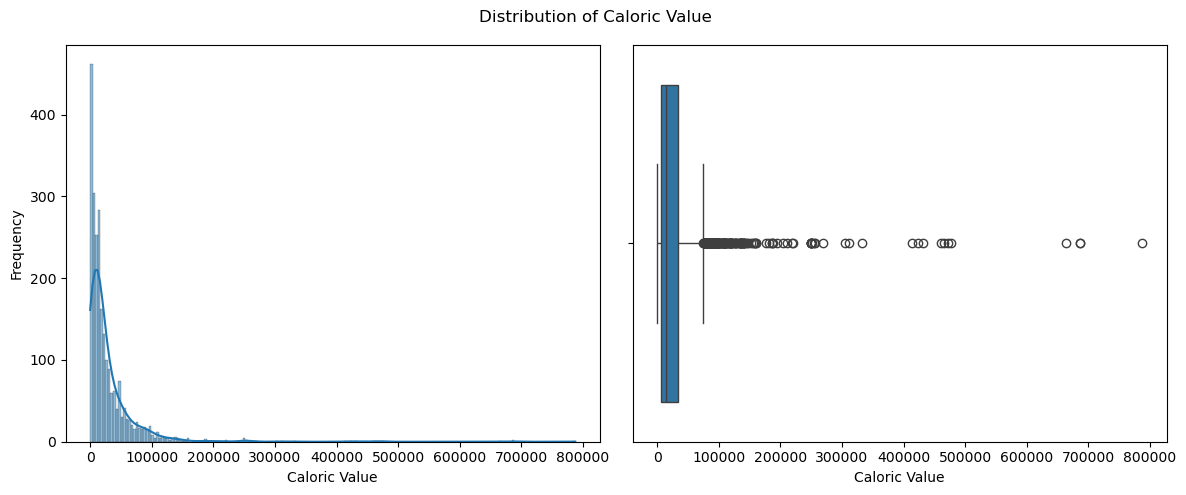

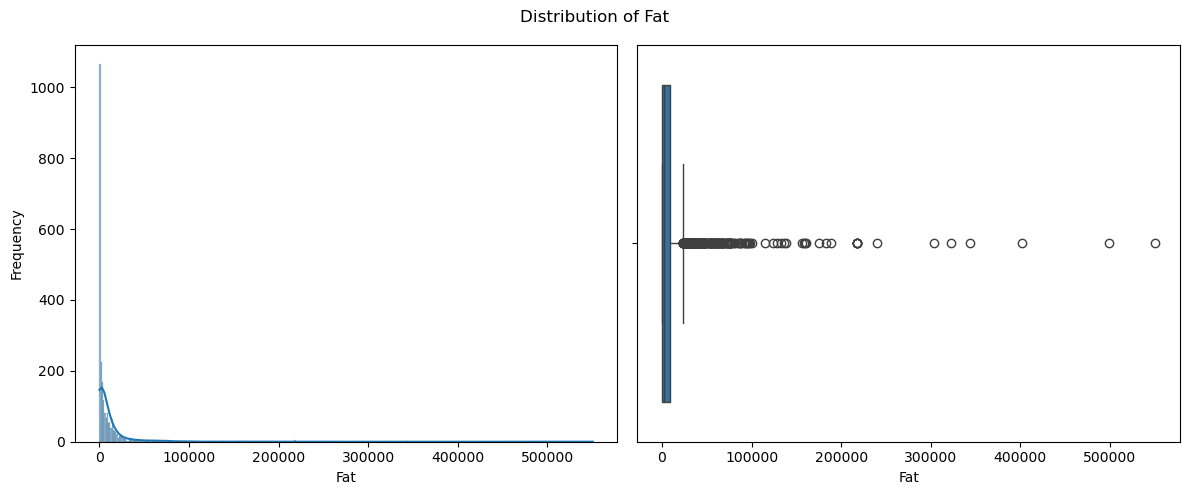

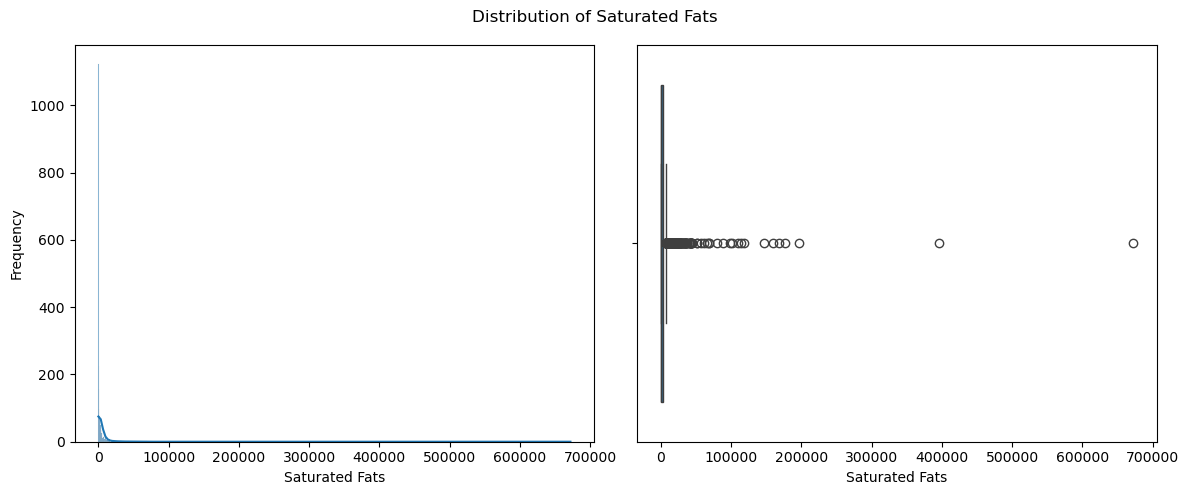

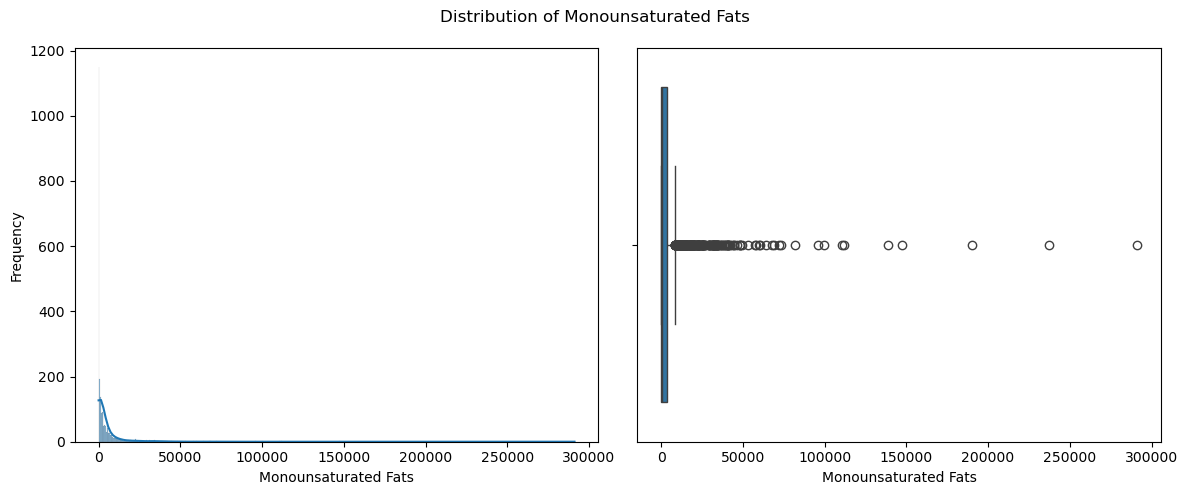

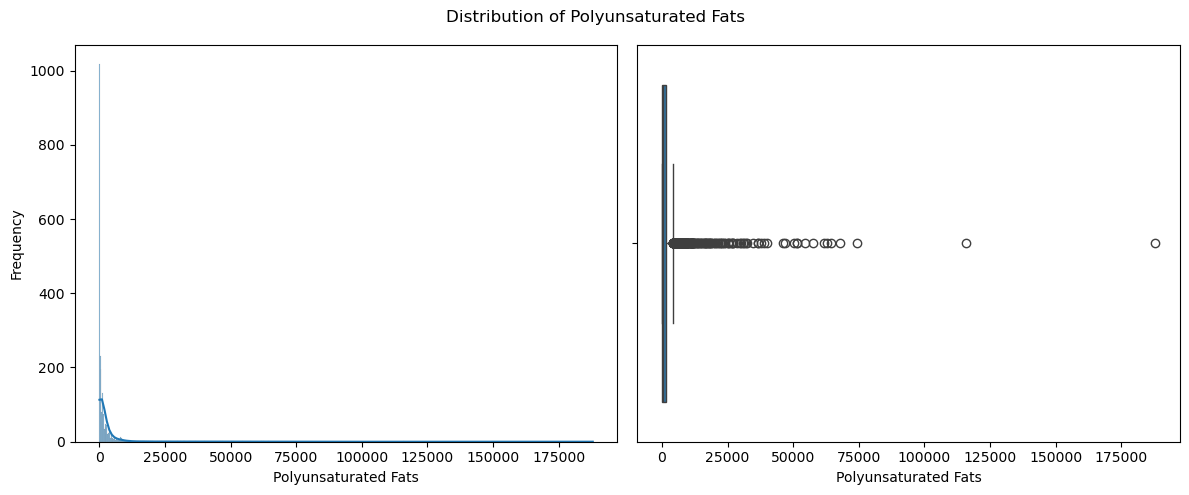

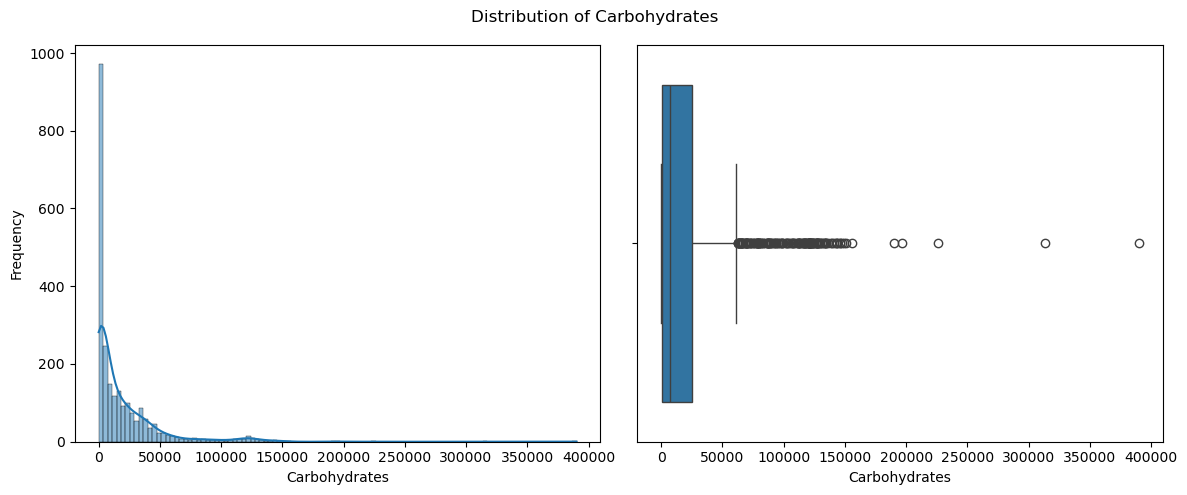

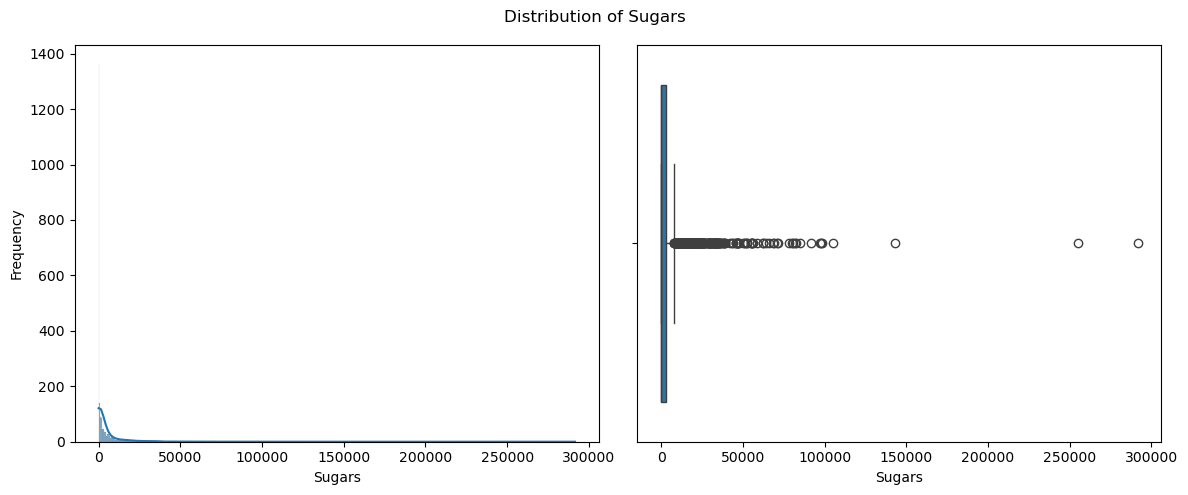

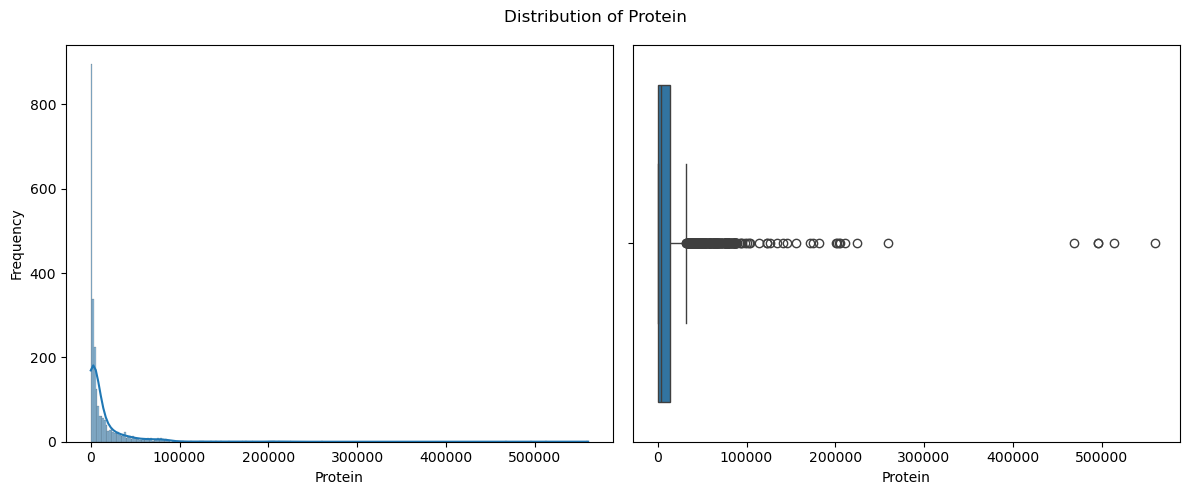

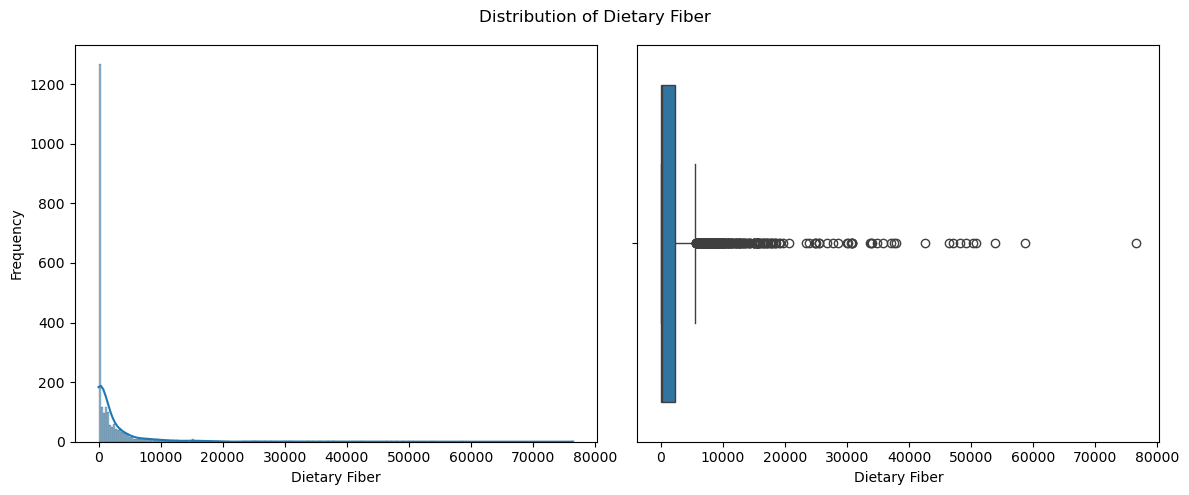

In [ ]:
# Check the data distribution of numerical columns
for col in merged_data.select_dtypes(include="number").columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    fig.suptitle(f"Distribution of {col}")

    # Histogram
    sns.histplot(merged_data[col], kde=True, ax=axes[0])
    axes[0].set_ylabel("Frequency")
    # Box PLot
    sns.boxplot(x=merged_data[col], ax=axes[1])

    plt.tight_layout()
    plt.show()

#### Multivariate Analysis

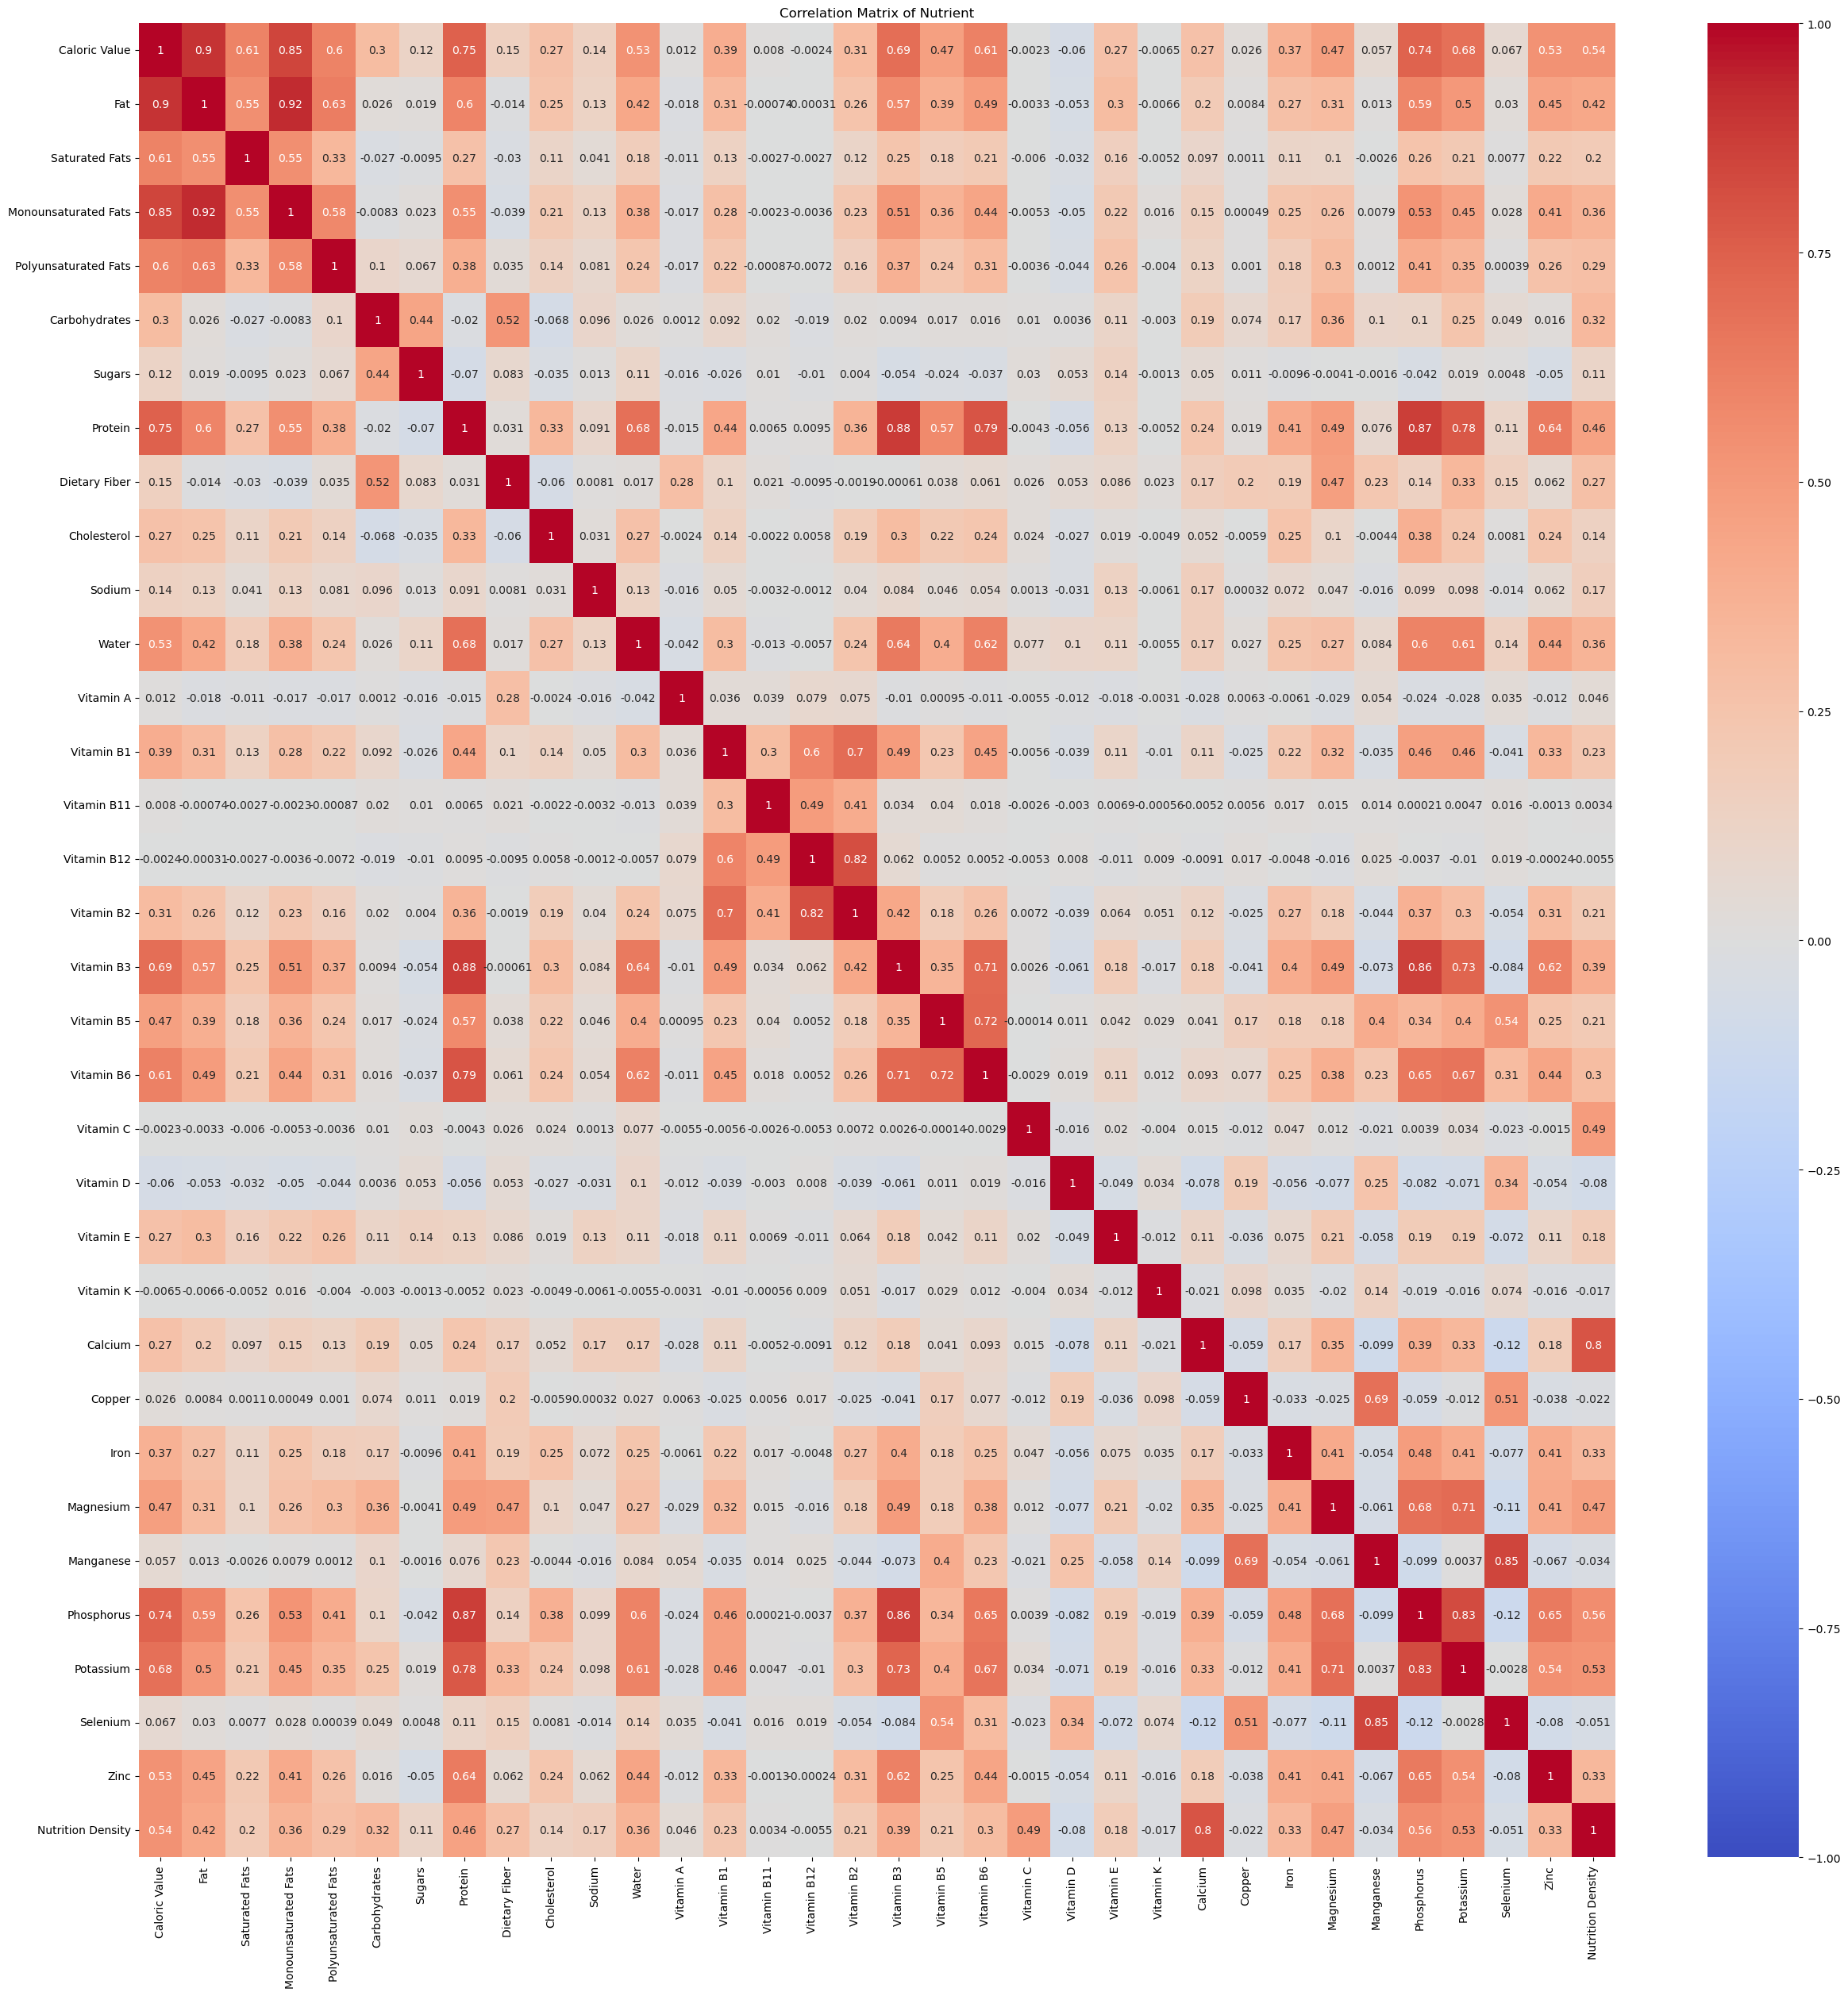

In [ ]:
# Check data correlation
plt.figure(figsize=(30, 30))
sns.heatmap(merged_data.select_dtypes(include="number").corr(),
            annot=True,
            cmap="coolwarm",
            vmin=-1,
            vmax=1)
plt.title("Correlation Matrix of Nutrient")
plt.show()

_Fingdings:_
* According to heatmap above, there are some nutrients that have small contribution to the nutrition density such as
    - Vitamin A
    - Vitamin B11
    - Vitamin B12
    - Vitamin D
    - Vitamin K
    - Copper
    - Manganese
    - Selenium

## Data Preparation

### Feature Enginering

In [ ]:
columns_to_eliminate = ["food", "Vitamin A", "Vitamin B11", "Vitamin B12", "Vitamin D", "Vitamin K", "Copper", "Manganese", "Selenium"]

selected_features = merged_data.drop(columns=columns_to_eliminate, axis=1)
selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Caloric Value         2395 non-null   float64
 1   Fat                   2395 non-null   float64
 2   Saturated Fats        2395 non-null   float64
 3   Monounsaturated Fats  2395 non-null   float64
 4   Polyunsaturated Fats  2395 non-null   float64
 5   Carbohydrates         2395 non-null   float64
 6   Sugars                2395 non-null   float64
 7   Protein               2395 non-null   float64
 8   Dietary Fiber         2395 non-null   float64
 9   Cholesterol           2395 non-null   float64
 10  Sodium                2395 non-null   float64
 11  Water                 2395 non-null   float64
 12  Vitamin B1            2395 non-null   float64
 13  Vitamin B2            2395 non-null   float64
 14  Vitamin B3            2395 non-null   float64
 15  Vitamin B5           

### Data Normalization

In [ ]:
normalizer = MinMaxScaler()

data_normalized = normalizer.fit_transform(selected_features)

data_normalized = pd.DataFrame(data_normalized)

data_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.008392,0.009079,0.004315,0.004466,0.001064,0.002050,0.001715,0.001606,0.000000,0.001389,...,0.006076,0.000001,0.000000,0.000006,0.000677,0.000029,0.000017,0.001367,0.000265,0.001808
1,0.035379,0.035228,0.016220,0.016833,0.004255,0.007945,0.009262,0.013921,0.000000,0.005985,...,0.004937,0.000000,0.007212,0.077522,0.000825,0.009223,0.021366,0.011396,0.004752,0.033262
2,0.008063,0.006537,0.003423,0.003092,0.000000,0.002307,0.011664,0.001428,0.001307,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001381
3,0.004937,0.003632,0.001935,0.001718,0.000011,0.003844,0.000312,0.002677,0.000000,0.000933,...,0.000443,0.000002,0.000024,0.000076,0.000800,0.000104,0.000004,0.002717,0.000238,0.001328
4,0.004937,0.004177,0.002083,0.002061,0.000223,0.003075,0.003087,0.002142,0.000000,0.000771,...,0.000190,0.000000,0.000216,0.017296,0.000066,0.001302,0.004153,0.003272,0.000360,0.006905


### Data

In [ ]:
# Feature
X = data_normalized.iloc[:, :-1]

# Target
y = data_normalized.iloc[:, -1]

### Split Data

In [ ]:
TEST_SIZE = 0.2

In [ ]:
## Split Function
def split_data(X, y, TEST_SIZE):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y,
                                                        test_size=TEST_SIZE,
                                                        random_state=123)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,
                                                    test_size=0.5,
                                                    random_state=123)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
# Split data into data_train, data_val, and data_test
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y, TEST_SIZE)

## Modeling

In [ ]:
num_of_features = 25

In [ ]:
input_shape = num_of_features

model = tf.keras.models.Sequential([
    Input(shape=(input_shape,)),
    Dense(units= 64, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(units= 32, activation="relu"),
    Dense(units=16, activation="relu"),
    Dense(units=1)
])

model.compile(
    optimizer="adam",
    loss="huber"
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                1664      
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                      

## Training

In [ ]:
# Set parameters
EPOCHS = 300
BATCH = 128

In [ ]:
# Train Model
history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH,
    validation_data=(X_val, y_val)
)

Epoch 1/300
15/15 [==============================] - 1s 16ms/step - loss: 0.1103 - val_loss: 0.0018
Epoch 2/300
15/15 [==============================] - 0s 4ms/step - loss: 0.0314 - val_loss: 0.0012
Epoch 3/300
15/15 [==============================] - 0s 4ms/step - loss: 0.0237 - val_loss: 0.0011
Epoch 4/300
15/15 [==============================] - 0s 4ms/step - loss: 0.0129 - val_loss: 0.0012
Epoch 5/300
15/15 [==============================] - 0s 4ms/step - loss: 0.0117 - val_loss: 0.0012
Epoch 6/300
15/15 [==============================] - 0s 12ms/step - loss: 0.0084 - val_loss: 0.0011
Epoch 7/300
15/15 [==============================] - 0s 5ms/step - loss: 0.0068 - val_loss: 0.0011
Epoch 8/300
15/15 [==============================] - 0s 5ms/step - loss: 0.0066 - val_loss: 0.0012
Epoch 9/300
15/15 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.0012
Epoch 10/300
15/15 [==============================] - 0s 5ms/step - loss: 0.0055 - val_loss: 0.0010
Epoch 1

## Evaluation

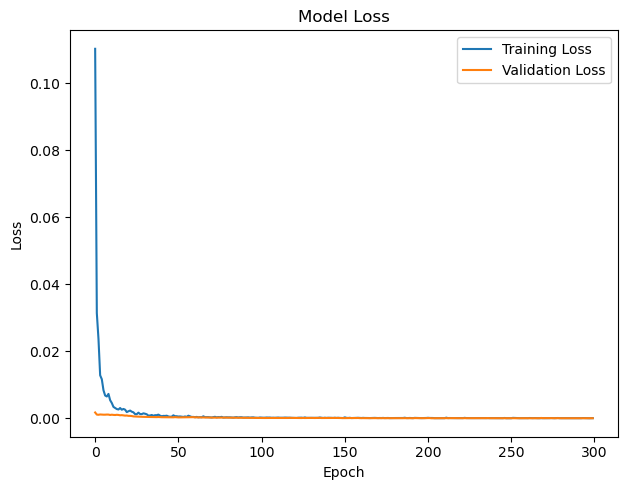

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
loss = model.evaluate(X_val, y_val)

print(f"Loss: {loss:.4f}")

8/8 [==============================] - 0s 1ms/step - loss: 7.3715e-05
Loss: 0.0001


In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

8/8 [==============================] - 0s 823us/step
MSE: 0.0001
MAE: 0.0066
R-squared: 0.9391


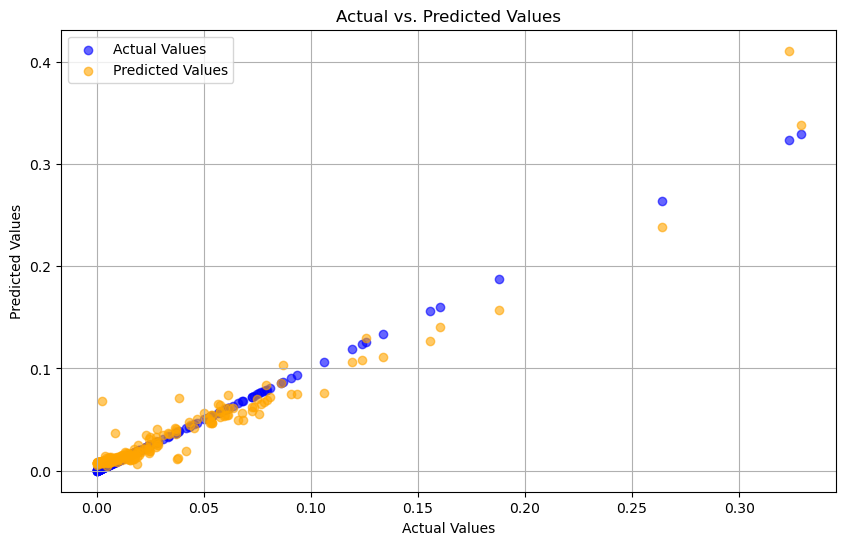

In [ ]:
plt.figure(figsize=(10, 6))

# Actual Value
plt.scatter(y_test, y_test, color='blue', alpha=0.6, label='Actual Values')

# Predicted Value
plt.scatter(y_test, y_pred, color='orange', alpha=0.6, label='Predicted Values')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()  
plt.grid()  
plt.show()

## Prediction

### Create Dummy Data

In [ ]:
# Create Dummy Data
dummy_data = pd.DataFrame({
    col: np.random.uniform(merged_data[col].min(), merged_data[col].median(), size=10)
    for col in merged_data.select_dtypes("number").columns[:-1]
})

dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Caloric Value         10 non-null     float64
 1   Fat                   10 non-null     float64
 2   Saturated Fats        10 non-null     float64
 3   Monounsaturated Fats  10 non-null     float64
 4   Polyunsaturated Fats  10 non-null     float64
 5   Carbohydrates         10 non-null     float64
 6   Sugars                10 non-null     float64
 7   Protein               10 non-null     float64
 8   Dietary Fiber         10 non-null     float64
 9   Cholesterol           10 non-null     float64
 10  Sodium                10 non-null     float64
 11  Water                 10 non-null     float64
 12  Vitamin A             10 non-null     float64
 13  Vitamin B1            10 non-null     float64
 14  Vitamin B11           10 non-null     float64
 15  Vitamin B12           10 n

In [ ]:
dummy_data.round(2).head()

,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Vitamin K,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc
0,5040.35,1685.06,48.25,415.85,329.28,4550.38,72.57,2418.88,134.79,0.0,...,0.00,0.48,0.09,0.58,4.72,0.13,37.48,80.28,0.01,0.10
1,238.71,1034.72,107.20,454.38,105.48,3207.65,44.37,891.52,150.07,0.0,...,0.00,1.61,0.06,0.24,5.81,0.09,37.74,41.63,0.05,0.12
2,12730.84,652.64,173.19,445.46,294.71,6323.10,52.07,335.29,176.84,0.0,...,0.00,13.11,0.05,0.34,1.46,0.17,2.10,31.79,0.02,0.27
3,3309.33,840.66,9.93,256.24,146.47,1605.73,84.43,796.77,165.84,0.0,...,0.01,10.92,0.08,0.17,0.95,0.02,33.92,89.72,0.04,0.02
4,7796.06,31.59,398.91,327.37,377.22,2421.91,77.51,1127.74,188.65,0.0,...,0.00,3.23,0.01,0.09,8.15,0.06,28.43,9.23,0.02,0.30


### Preprocessing Dummy Data

In [ ]:
columns_to_eliminate[1:]

['Vitamin A',
 'Vitamin B11',
 'Vitamin B12',
 'Vitamin D',
 'Vitamin K',
 'Copper',
 'Manganese',
 'Selenium']

In [ ]:
dummy_data = dummy_data.drop(columns=columns_to_eliminate[1:], axis=1)

In [ ]:
print(f"Number of columns: {dummy_data.shape[1]}")

Number of columns: 25


In [ ]:
nutirent_density_pred = model.predict(dummy_data)

print("Nutirent Density for dummy_data: ")
dummy_data["Nutrient Density"] = pd.Series(nutirent_density_pred).round(2)

dummy_data

NameError: name 'model' is not defined

## Conclusion

*

## Further Development